In [2]:
from ipywidgets import interact, FloatSlider, RadioButtons,Dropdown,SelectMultiple,FloatRangeSlider
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import h5py
import os
import scipy
import sklearn
from scipy.stats import pearsonr
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']


Populating the interactive namespace from numpy and matplotlib


/apps/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
wholeannotation = pd.read_table("wholeannotation.csv",sep=',')

In [8]:
wholeannotation['sampleuse'][wholeannotation['sampleuse']==0] = 1

In [9]:
wholeannotation.to_csv('wholeannotation.csv')

In [ ]:
np.where(wholeannotab['Disease_status'] =='HCC_after_surgery')
np.array(wholeannotab['Sample_ID'])[46]  #14 31 46  去掉BD-low-mix，507891-B，511122-A
wholeannotab['use'] =1
wholeannotab['use'][np.array([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
        59, 60, 64, 65,14 ,31, 46 ])] =0

In [121]:
wholeannotab.to_csv('wholeannotation.csv')

In [127]:
annotation = pd.read_table("hcc_lulab.sample.info.txt", sep = "\t")
print (wholeannotation.shape)
wholeannotation.head()

(66, 24)


,Unnamed: 0,Unnamed: 0.1,Sample_ID,Disease_status,Sex,Age,Tumor_size(cm),Multiple_tumor,Vascular_invasion,Satellite_nonules,...,AST,ALB,PT,Stage-BCLC,RNA_mass(ng/mlplasma),Batch,spike-in,Seq-mode,DNase1,use
0,0,0,lulab_249136_B,HCC_before_surgery,M,43,2.8,No,No,0,...,279,36.6,10.1,A,27.63,7th_201803,NaN,NaN,NaN,1
1,1,1,lulab_385247_B,HCC_before_surgery,M,54,4,No,No,1,...,27,42.5,12,A,33.45,4th_201801,NaN,NaN,NaN,1
2,2,2,lulab_423976_B,HCC_before_surgery,F,60,_,No,Yes,0,...,29,18.5,15,C,32.66,3nd_201801,NaN,NaN,NaN,1
3,3,3,lulab_497411_B,HCC_before_surgery,F,70,8,No,No,0,...,45,44.7,11.3,A,28.32,2nd_201712,0,PE150,N,1
4,4,4,lulab_497497_B,HCC_before_surgery,M,44,12.3,Yes,No,0,...,63,43.8,11.2,B,34.24,1st_201711,0,PE150,N,1


In [90]:
dataarr = allmx

In [88]:
allmx.shape

(854770, 64)

# sample QC

##### Remove genes that are not expressed in any samples

In [91]:
np.sum(np.sum(dataarr,axis=1) >0)

111994

#### total counts

Text(0.5,1,'clean_reads')

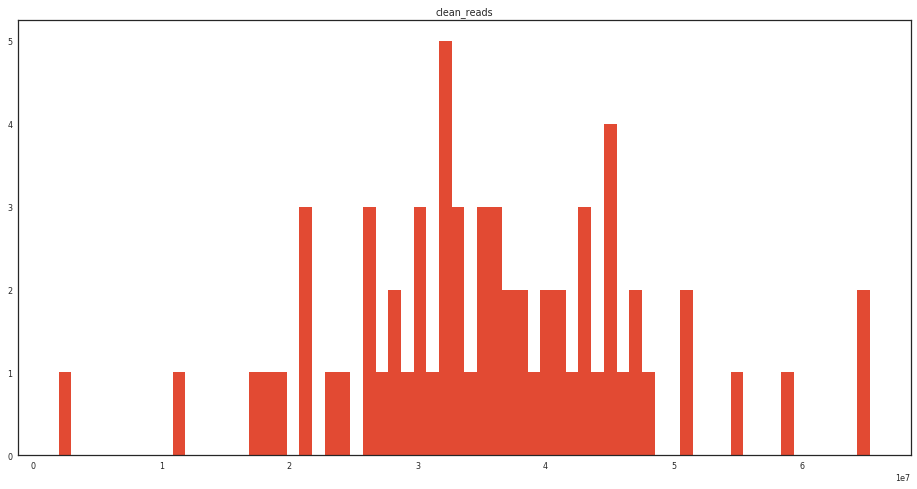

In [92]:
fig,ax=plt.subplots(1,figsize=(16,8))
ax.hist(np.sum(dataarr,axis=0),bins=64)
ax.set_title('clean_reads')

In [93]:
np.argsort(np.sum(dataarr,axis=0))

array([37, 19, 48, 47, 35,  5,  9, 36, 13, 30, 31, 44,  7, 29,  6, 17, 25,
       34, 28, 38, 10, 33, 23, 22, 27,  3,  4,  2, 20, 39,  0, 15, 26, 32,
       40, 42, 21, 46,  8, 56, 41, 61, 54, 52, 53, 43, 62, 63, 60, 16, 45,
       58, 55, 24, 59, 51, 11,  1, 12, 57, 14, 49, 50, 18])

In [94]:
np.sort(np.sum(dataarr,axis=0))

array([ 1977430, 11778820, 17302253, 18547349, 19611496, 21077616,
       21469101, 21549823, 23677899, 24589560, 25889082, 26377048,
       26627987, 27607224, 28420055, 28643077, 29556495, 29860574,
       29943588, 30110620, 30706338, 31743992, 31961162, 32062423,
       32143669, 32630664, 33033279, 33405075, 33609042, 33752096,
       34954952, 35405451, 35586583, 35987259, 36236859, 36337615,
       36818087, 37425652, 37910178, 37984192, 39350320, 39674072,
       39953298, 40631097, 40913169, 41933864, 42634211, 42745295,
       42797923, 43858417, 44557054, 44972993, 44985182, 45053719,
       45933941, 46740233, 46895821, 48086860, 50503291, 50750565,
       54789752, 58467084, 64610989, 65333800])

In [21]:
##### 根据total counts
37, 19, 48

2524613.0

In [96]:
np.argsort(np.sum(dataarr,axis=0))

array([37, 19, 48, 47, 35,  5,  9, 36, 13, 30, 31, 44,  7, 29,  6, 17, 25,
       34, 28, 38, 10, 33, 23, 22, 27,  3,  4,  2, 20, 39,  0, 15, 26, 32,
       40, 42, 21, 46,  8, 56, 41, 61, 54, 52, 53, 43, 62, 63, 60, 16, 45,
       58, 55, 24, 59, 51, 11,  1, 12, 57, 14, 49, 50, 18])

In [95]:
np.array(annotation['Sample_ID'])[np.argsort(np.sum(dataarr,axis=0))[:2]]

array(['lulab_Normal_4', 'lulab_511485_B'], dtype=object)

#### 每个样本的feature 个数

(array([1., 0., 0., 1., 1., 0., 2., 4., 2., 3., 1., 5., 3., 0., 0., 1., 2.,
        4., 3., 2., 2., 6., 2., 0., 1., 1., 0., 2., 0., 2., 1., 0., 2., 0.,
        0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([14446.      , 14846.984375, 15247.96875 , 15648.953125,
        16049.9375  , 16450.921875, 16851.90625 , 17252.890625,
        17653.875   , 18054.859375, 18455.84375 , 18856.828125,
        19257.8125  , 19658.796875, 20059.78125 , 20460.765625,
        20861.75    , 21262.734375, 21663.71875 , 22064.703125,
        22465.6875  , 22866.671875, 23267.65625 , 23668.640625,
        24069.625   , 24470.609375, 24871.59375 , 25272.578125,
        25673.5625  , 26074.546875, 26475.53125 , 26876.515625,
        27277.5     , 27678.484375, 28079.46875 , 28480.453125,
        28881.4375  , 29282.421875, 29683.40625 , 30084.390625,
        30485.375   , 30886.359375, 31287.34375 , 31688.328125,
      

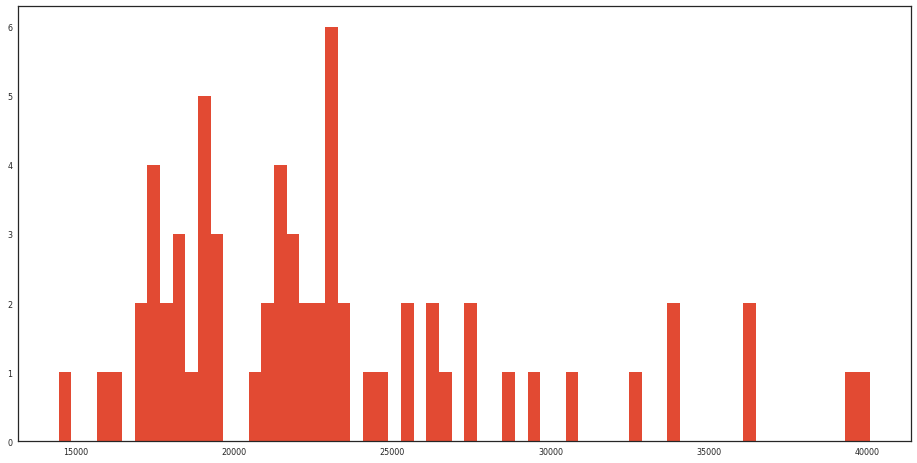

In [98]:
fig,ax=plt.subplots(1,figsize=(16,8))
ax.hist(np.sum(dataarr>0,axis=0),bins=64)

In [99]:
np.argsort(np.sum(dataarr>0,axis=0))
##### no overlap

array([53, 52, 46, 34, 54, 42, 38, 49, 56, 47,  9, 62, 58, 29, 26, 43, 51,
       33, 57, 55, 25, 48,  5, 24, 20, 63, 32, 61, 30, 44, 50, 22, 13, 60,
       23, 11,  7, 35, 28,  4, 21, 15, 39,  1, 40, 17, 16, 36, 45, 27, 12,
       10, 19,  8, 59, 41,  3,  2,  6,  0, 14, 31, 18, 37])

In [100]:
wholeratiotable = pd.read_table('/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/stat/table/hcc_lulab.readsN.stat.tsv.tmp.re')

In [101]:
for i in range(64):
     wholeratiotable.iloc[i,2:] = 100*np.array(wholeratiotable.iloc[i,2:])/np.array(wholeratiotable['cleanN'])[i]

In [191]:
ratiotable = pd.read_table('64_order_summary.per',sep='\t')
display(ratiotable.head())
ratiotable.shape

,Sample,cleanN,rRNA_N,miRNA,piRNA,Y_RNA,snRNA,snoRNA,srpRNA,tRNA,lncRNA,mRNA,hg38other,nonHuman_N
0,10515058-A,100,5.977362,26.590223,2.364218,39.307600,0.239218,4.234797,0.023232,0.135685,6.016111,0.634485,8.793441,5.683629
1,12402567-A,100,1.939323,46.150373,1.679384,15.322706,0.029978,0.742426,0.011505,0.162544,11.181159,0.747482,6.212425,15.820697
2,13515292-A,100,0.812682,32.515993,0.565366,27.295720,0.120886,0.066381,0.017906,0.079247,12.787434,0.600898,10.356909,14.780579
3,17402567-B,100,2.059131,37.652880,1.109021,17.352787,0.059478,0.262899,0.021997,0.171109,10.639102,0.731762,6.931725,23.008108
4,249136-B,100,7.419210,22.675072,3.591920,12.611243,0.178824,9.597369,0.013141,0.112242,9.113514,0.514352,5.509346,28.663765


(61, 14)

In [102]:
def get_ratio(file):
    readfromtablearr = np.array(pd.read_table(file,names=[0,1,2,3])[3])
    cleanN= readfromtablearr[2] 
    allratio= readfromtablearr[np.concatenate((np.array([3]),np.arange(6,17)))]/cleanN*100
    #print (allratio.sum())
    return allratio


In [223]:
np.concatenate((np.array(['HBV-3',100]).astype('str'),
                             get_ratio('/Share/home/younglee/projects/exRNA/hcc_lulab/stat/mix1_combined_R1.readsN.stat.tsv'))).reshape(1,-1).shape
             

(1, 14)

In [225]:
HBVtable = pd.DataFrame(np.concatenate((np.concatenate((np.array(['HBV-1',100]).astype('str'),
                             get_ratio('/Share/home/younglee/projects/exRNA/hcc_lulab/stat/mix1_combined_R1.readsN.stat.tsv'))).reshape(1,-1),
            np.concatenate((np.array(['HBV-2',100]).astype('str'),
                             get_ratio('/Share/home/younglee/projects/exRNA/hcc_lulab/stat/mix2_combined_R1.readsN.stat.tsv'))).reshape(1,-1),
             np.concatenate((np.array(['HBV-3',100]).astype('str'),
                             get_ratio('/Share/home/younglee/projects/exRNA/hcc_lulab/stat/mix3_combined_R1.readsN.stat.tsv'))).reshape(1,-1))),
             columns=ratiotable.columns)


In [244]:
wholeratiotable = pd.concat((ratiotable,HBVtable))
wholeratiotable.head()
wholeratiotable[wholeratiotable.columns[1:]] = wholeratiotable[wholeratiotable.columns[1:]].apply(pd.to_numeric, errors='coerce')

Text(0.5,1,'rRNA ratio')

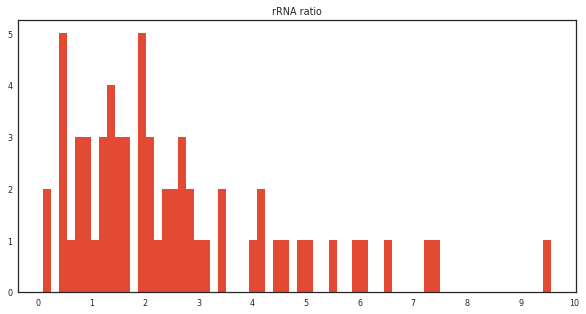

In [103]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(np.array(wholeratiotable['rRNA_N']),bins=64)
ax.set_xticks(np.arange(0,11))
ax.set_title('rRNA ratio')
#小于10

In [104]:
np.argsort(-np.array(wholeratiotable['rRNA_N']))

array([17,  4, 22, 29,  0,  7, 24, 16,  8, 33, 15, 28, 25, 21, 61, 59, 34,
       48, 60, 47, 30, 11, 44, 10,  5, 26, 63, 23, 18,  3,  9, 40,  1, 14,
       19, 58,  6, 12, 46, 27, 45, 42, 20, 56, 62, 32, 43, 38, 31, 36, 53,
       51, 39,  2, 57, 35, 54, 41, 49, 55, 50, 52, 37, 13])

Text(0.5,1,'human genome mapped')

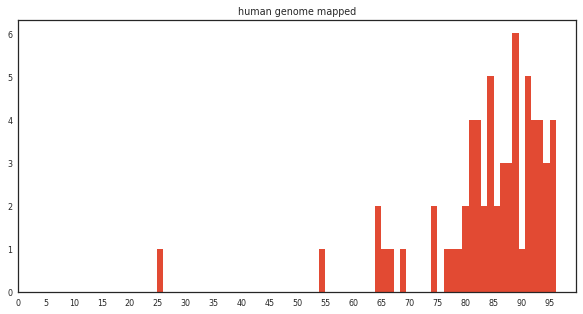

In [105]:
 #大于65
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(np.array(100 - wholeratiotable['rRNA_N'] - wholeratiotable['nonHuman_N']),bins=64)
ax.set_xticks(np.arange(0,100,5))
ax.set_title('human genome mapped')

In [131]:
np.argsort(np.array(100 - wholeratiotable['rRNA_N'] - wholeratiotable['nonHuman_N']))

array([37, 36,  4, 48,  5,  9,  6, 30, 19, 21,  3, 32, 29, 10,  8, 59, 45,
       47, 16, 12, 26, 17, 35,  1,  7, 40, 33, 22, 27,  2, 11, 28, 25, 15,
       13, 14, 24, 23,  0, 55, 46, 38, 50, 20, 18, 44, 60, 34, 61, 39, 31,
       43, 54, 57, 63, 42, 51, 62, 56, 58, 52, 41, 49, 53])

In [106]:
#30个癌症（注意有一个癌症的已经去除了是31个），11个正常人，3个HBV，19个after surgery分开看
hccind = np.setdiff1d(np.arange(0,31),14)
normalind  =np.arange(31,42)
afterind  =np.arange(42,61)
hbvind = np.arange(62,64)
allind = np.arange(0,64)

In [517]:
np.array(100 - wholeratiotable['rRNA_N'] - wholeratiotable['nonHuman_N'])

array([88.62704757, 83.83070476, 85.34643102, 77.50473705, 64.31018505,
       65.53994638, 68.53328253, 83.95779215, 80.53332328, 66.87211155,
       80.20295539, 85.81691602, 82.01668635, 87.87989085, 87.99999994,
       87.19629081, 81.99068875, 82.42393462, 90.83719742, 74.38407767,
       90.54897854, 76.91472541, 84.90185387, 88.38188488, 88.2169382 ,
       86.53325454, 82.03295297, 84.93541946, 86.18273894, 79.74472804,
       74.27299766, 92.09413738, 78.85179173, 84.5365743 , 91.56678704,
       83.67304721, 54.84587457, 24.77175646, 89.37428767, 91.79929502,
       84.08956745, 95.74635416, 93.59684668, 92.33898761, 91.10668007,
       81.01834657, 89.31717216, 81.61933576, 64.34608606, 95.80636161,
       89.40370188, 93.70894141, 95.45800132, 96.12382097, 92.42759919,
       89.01294835, 94.18277555, 93.04664904, 94.26324954, 80.56110362,
       91.38679869, 91.6419369 , 94.08211115, 93.57150254])

In [107]:
def get_table(ind):
    '''
    ind of sample
    '''
    tab1 = pd.DataFrame(np.concatenate((np.array(100 - wholeratiotable['rRNA_N'] - wholeratiotable['nonHuman_N'])[ind],
                            np.array(wholeratiotable['rRNA_N'])[ind],np.array(wholeratiotable['hg38other'])[ind]
                                       ,np.array(wholeratiotable['Y_RNA'])[ind],np.array(wholeratiotable['miRNA'])[ind])),columns=['ratio'])
    tab2= pd.DataFrame(np.concatenate((np.repeat('human genome',64)[ind],np.repeat('rRNA',64)[ind],
                            np.repeat('HG-Transcriptome',64)[ind],np.repeat('Y_RNA',64)[ind],
                                      np.repeat('miRNA',64)[ind])),columns=['kinds'])
    return pd.concat((tab1,tab2),axis=1)

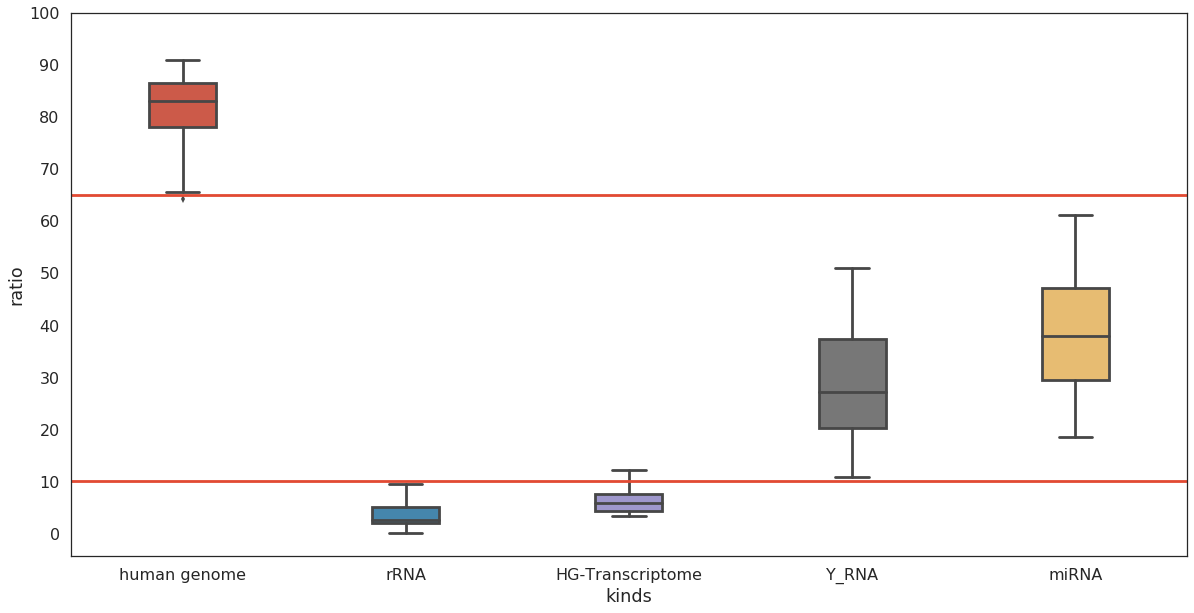

In [519]:
import seaborn as sns
sns.set_context(contexts[int(2)])
sns.set_style(styles[int(0)])
fig,ax=plt.subplots(1,figsize=(20,10))
sns.boxplot(data = get_table(hccind),x='kinds',y='ratio',ax=ax,width=0.3)
ax.set_yticks(np.arange(0,110,10))
ax.axhline(y=10)
ax.axhline(y=65)

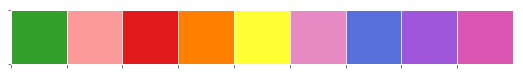

In [2]:
palettes = [sns.color_palette("Paired"),"PRGn","Set1","Set2","Set3",sns.color_palette("hls", 8),
           sns.hls_palette(8, l=.6, s=.8),sns.color_palette("husl", 8),
           sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]),
           sns.color_palette("cubehelix", 8)[2:],sns.color_palette("RdBu_r", 7),
           sns.color_palette("coolwarm", 10)]
selfdesignpalette = np.concatenate((np.array(palettes[0][3:]),np.array(sns.color_palette(palettes[2]))[np.array([4,5])]
                                   ,np.array(sns.color_palette(palettes[3]))[3].reshape(1,-1),np.array(sns.color_palette(palettes[5]))[np.array([-3,-2,-1])]
                                  ))
sns.palplot(selfdesignpalette)
palettes_ = {}
palettes_[0] =  selfdesignpalette
for i in range(len(palettes)):
    palettes_[i+1] = palettes[i]
palettes = palettes_

In [108]:
def get_std(ind,stdnum):
    hg = np.array(get_table(ind)[get_table(ind)['kinds'] =='human genome']['ratio'])
    rrna = np.array(get_table(ind)[get_table(ind)['kinds'] =='rRNA']['ratio'])
    otherhg = np.array(get_table(ind)[get_table(ind)['kinds'] =='HG-Transcriptome']['ratio'])
    yrna = np.array(get_table(ind)[get_table(ind)['kinds'] =='Y_RNA']['ratio'])
    mirna = np.array(get_table(ind)[get_table(ind)['kinds'] =='miRNA']['ratio'])
    y = np.array([np.average(hg),np.average(rrna),np.average(otherhg),np.average(yrna),np.average(mirna)])
    err = np.array([np.std(hg)*stdnum,np.std(rrna)*stdnum,np.std(otherhg)*stdnum,np.std(yrna)*stdnum,np.std(mirna)*stdnum])
    return y,err
    

In [109]:
get_std(allind,2)

(array([84.02876721,  2.54814823,  5.23525767, 34.50735027, 38.57519945]),
 array([22.95295036,  3.93780228,  5.47811797, 30.9687348 , 24.2262224 ]))

In [110]:
def box_plot_1(styind,contextind,width,height,showdot,showbox,dotsize,fontsize,
               ylim,boxwidth,box_violin,palettesind,saturation,useind,stdnum,elinewidth):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    

    if useind =='All':
        datause = get_table(allind)
        yforerr,error = get_std(allind,stdnum)
    elif useind =='HCC':
        datause =get_table(hccind)
        yforerr,error = get_std(hccind,stdnum)
    elif useind =='Normal':
        datause =get_table(normalind)
        yforerr,error = get_std(normalind,stdnum)
    elif useind =='After Surgery':
        datause =get_table(afterind)
        yforerr,error = get_std(afterind,stdnum)
    elif useind =='HBV':
        datause =get_table(hbvind)
        yforerr,error = get_std(hbvind,stdnum)
    fig, ax = plt.subplots(figsize=(width,height))
    ax.set_yticks(np.arange(0,110,10))
    ax.axhline(y=10)
    ax.axhline(y=65)

    
    if showbox =='yes':
        if box_violin=='violin':
            sns.violinplot(ax=ax,x='kinds',y='ratio', data=datause, palette=palettes[palettesind],width=boxwidth,saturation=saturation)
        elif box_violin=='box':
            sns.boxplot(ax=ax,x='kinds',y='ratio', data=datause, palette=palettes[palettesind],width=boxwidth,saturation=saturation)
    if showdot =='yes':
        sns.swarmplot(x='kinds',y='ratio', data=datause, size=dotsize, edgecolor="black", linewidth=.9)
    ax.set_ylim(ylim)
    ax.set_title(useind+' Sample Ratio Criteria Boxplot')
    # statistical annotation
    ax.errorbar(np.arange(0,5),yforerr,error,linestyle='None', marker='^',elinewidth=elinewidth,ecolor='m')
    
interact(box_plot_1,styind=FloatSlider(min=0,max=3,step=1,value=0),
               contextind=FloatSlider(min=0,max=3,step=1,value=1),
                width =FloatSlider(min=8,max=20,step=1,value=12),
                 height= FloatSlider(min=4,max=10,step=1,value=6),
         boxwidth= FloatSlider(min=0.05,max=1,step=0.05,value=0.6),
         dotsize= FloatSlider(min=1,max=8,step=0.2,value=2.3),
         fontsize= FloatSlider(min=8,max=30,step=2,value=12),
         ylim=FloatRangeSlider(value=[0, 100],min=-20,max=100,step=1),
            showdot=RadioButtons(options=['yes','no']),
         showbox=RadioButtons(options=['yes','no'],value='no'),
        box_violin = Dropdown(options=['box','violin'],value='box'),
        palettesind=IntSlider(min=0,max=len(palettes)-1,step=1,value=4),
        saturation=FloatSlider(min=0,max=1,step=0.1,value=0.8),
         stdnum=FloatSlider(min=0,max=10,step=0.1,value=2),
         elinewidth=FloatSlider(min=0,max=40,step=1,value=28),
        useind =RadioButtons(options=['All','HCC','Normal','After Surgery','HBV']))



interactive(children=(FloatSlider(value=0.0, description='styind', max=3.0, step=1.0), FloatSlider(value=1.0, description='contextind', max=3.0, step=1.0), FloatSlider(value=12.0, description='width', max=20.0, min=8.0, step=1.0), FloatSlider(value=6.0, description='height', max=10.0, min=4.0, step=1.0), RadioButtons(description='showdot', options=('yes', 'no'), value='yes'), RadioButtons(description='showbox', index=1, options=('yes', 'no'), value='no'), FloatSlider(value=2.3, description='dotsize', max=8.0, min=1.0, step=0.2), FloatSlider(value=12.0, description='fontsize', max=30.0, min=8.0, step=2.0), FloatRangeSlider(value=(0.0, 100.0), description='ylim', min=-20.0, step=1.0), FloatSlider(value=0.6, description='boxwidth', max=1.0, min=0.05, step=0.05), Dropdown(description='box_violin', options=('box', 'violin'), value='box'), IntSlider(value=4, description='palettesind', max=12), FloatSlider(value=0.8, description='saturation', max=1.0), RadioButtons(description='useind', options=('All', 'HCC', 'Normal', 'After Surgery', 'HBV'), value='All'), FloatSlider(value=2.0, description='stdnum', max=10.0), FloatSlider(value=28.0, description='elinewidth', max=40.0, step=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot_1>

In [154]:
pd.DataFrame(np.concatenate((np.array(wholeratiotable['sample']).reshape(-1,1),np.array(wholeratiotable['cleanN'] - wholeratiotable['rRNA_N'] - wholeratiotable['nonHuman_N']).reshape(-1,1),
               np.array(wholeratiotable['rRNA_N']).reshape(-1,1),np.array(wholeratiotable['hg38other']).reshape(-1,1),np.array(wholeratiotable['Y_RNA']).reshape(-1,1),
               np.array(wholeratiotable['miRNA']).reshape(-1,1)),axis=1),columns=['sampleid','human genome','rRNA','HG-Transcriptome',
                                                            'Y_RNA','miRNA']).to_csv('criteria_ratio_table.csv')

In [112]:
np.argsort(np.array(wholeratiotable['cleanN'] - wholeratiotable['rRNA_N'] - wholeratiotable['nonHuman_N']))

array([37, 36,  4, 48,  5,  9,  6, 30, 19, 21,  3, 32, 29, 10,  8, 59, 45,
       47, 16, 12, 26, 17, 35,  1,  7, 40, 33, 22, 27,  2, 11, 28, 25, 15,
       13, 14, 24, 23,  0, 55, 46, 38, 50, 20, 18, 44, 60, 34, 61, 39, 31,
       43, 54, 57, 63, 42, 51, 62, 56, 58, 52, 41, 49, 53])

In [113]:
np.argsort(np.array(wholeratiotable['miRNA']))

array([37, 27, 25,  9, 26,  5, 30,  7, 44, 62, 53, 24, 43, 29, 22, 33, 23,
       49,  4, 56, 42, 57, 52, 15,  0, 51, 63, 55, 54, 50, 38, 58, 61, 36,
       21, 48,  8, 17, 34, 19, 60, 40, 31, 28,  2,  6, 14, 20, 41, 47, 10,
       16, 11, 39,  3, 18, 13, 32, 45, 59, 35, 12,  1, 46])

Text(0.5,1,'other genome region')

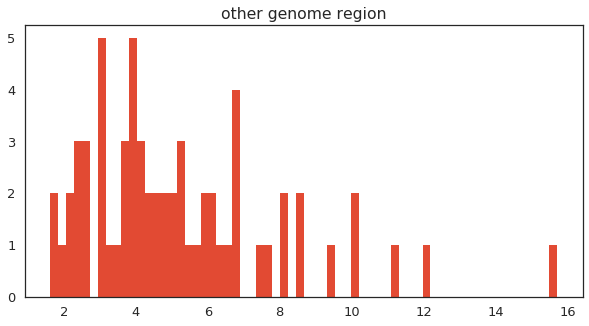

In [132]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(np.array(wholeratiotable['hg38other']) ,bins=64)
ax.set_title('other genome region')
#ax.set_xticks(np.arange(0,10,1))
#小于10

In [133]:
np.argsort(np.array(wholeratiotable['hg38other']))

array([49, 53, 52, 51, 57, 50, 56, 58, 42, 54, 43, 60, 63, 61, 62, 46,  4,
       34, 38, 55, 44,  1, 11, 28, 40, 29, 33, 26,  9, 45, 12, 20, 36, 25,
       13, 24, 39, 32, 23, 59, 16, 35, 30,  8, 27,  5, 21, 47,  3, 15, 48,
        7, 14,  0, 41, 22,  6, 17, 19,  2, 10, 31, 18, 37])

In [134]:
np.argsort(np.array(wholeratiotable['Y_RNA']))

array([37,  6, 36, 46,  4, 59, 32, 12,  1, 35, 45, 48,  3, 16, 10, 19, 17,
       18, 47, 13,  8, 11, 22, 21,  2, 14,  5, 28, 29, 40, 15, 31, 39, 30,
        9, 60, 20,  7, 41,  0, 33, 24, 34, 42, 23, 38, 63, 55, 61, 27, 50,
       26, 25, 58, 54, 44, 43, 51, 56, 62, 57, 52, 49, 53])

In [133]:
np.argsort(np.array(wholeratiotable['hg38other']))

array([49, 53, 52, 51, 57, 50, 56, 58, 42, 54, 43, 60, 63, 61, 62, 46,  4,
       34, 38, 55, 44,  1, 11, 28, 40, 29, 33, 26,  9, 45, 12, 20, 36, 25,
       13, 24, 39, 32, 23, 59, 16, 35, 30,  8, 27,  5, 21, 47,  3, 15, 48,
        7, 14,  0, 41, 22,  6, 17, 19,  2, 10, 31, 18, 37])

In [126]:
wholeratioarr = np.array(wholeratiotable.iloc[:,np.array([3,4,5,6,7,8,10,11,12,13,14,15,16,17,18])])
stdratio = np.average(wholeratioarr,axis=0)
stdratio

array([2.54814823e+00, 9.74518518e+01, 8.40158662e+01, 3.85751994e+01,
       2.38643309e+00, 3.45073503e+01, 1.15771537e-01, 1.64478972e+00,
       9.88551967e-02, 1.15203953e-02, 5.29876595e-01, 4.17967538e-01,
       4.92335497e-01, 5.23525767e+00, 1.34230846e+01])

In [125]:
wholeratiotable.iloc[:,np.array([3,4,5,6,7,8,10,11,12,13,14,15,16,17,18])].head()

,rRNA_N,keptN,hg38,miRNA,piRNA,Y_RNA,tRNA,snoRNA,snRNA,vaultRNA,lncRNA,mRNA,tucpRNA,hg38other,nonHuman_N
0,6.012773,93.987227,88.617063,32.469153,2.971137,39.292797,0.135011,3.761566,0.235441,0.004226,1.013104,0.435555,0.556072,7.733610,5.360179
1,1.952328,98.047672,83.797978,61.061942,1.818502,15.317016,0.162451,0.662020,0.029268,0.003262,0.356986,0.388581,0.189121,3.828094,14.216967
2,0.819189,99.180811,85.325292,45.848824,0.625427,27.291703,0.079247,0.063487,0.118853,0.004257,0.547113,0.523223,0.222032,10.005685,13.834380
3,2.080581,97.919419,77.454720,50.209952,1.250033,17.345263,0.171030,0.234794,0.058476,0.002102,0.596645,0.615933,0.308202,6.686643,20.414682
4,7.476131,92.523869,64.304406,31.935903,4.544511,12.592053,0.108837,9.070770,0.179335,0.004223,1.348024,0.329006,0.819885,3.367820,28.213684


In [127]:
from scipy.stats import pearsonr

In [128]:
pccdata = np.ndarray([61,])
for i in range(61):
    pccdata[i] = pearsonr(wholeratioarr[i],stdratio)[0]

Text(0.5,1,'PCC')

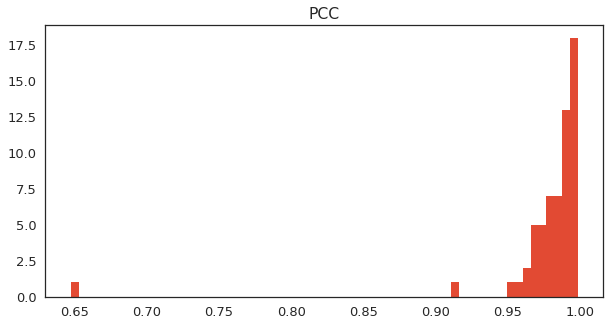

In [129]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(pccdata ,bins=64)
ax.set_title('PCC')
#ax.set_xticks(np.arange(0,10,1))
#小于10

In [130]:
np.argsort(pccdata)

array([37, 36, 46,  6,  4, 48, 59,  9, 12,  5, 53,  1, 32, 35, 45, 49, 27,
       52, 25,  3, 44, 56, 26, 57, 43, 51, 19, 10, 16, 58, 18, 30, 54, 13,
       17, 42, 22, 50, 24, 23, 55,  7, 38, 47,  0, 41, 11, 34, 39,  2, 29,
       31, 15, 60, 21, 33, 14, 20,  8, 28, 40])

In [ ]:
37  #total reads
37, 36,  4, 48,  5,  9,  6, 30, 19, 21,  3, 32, 29  # human genome
49, 53, 52, 51, 57, 50, 56, 58, 42, 54, 43, 60, 63, 61 #other genome region
37, 36, 46,  6,  4, 48, 59,  9, 12,  5, 53,  1, 32, 35 #PCC


In [164]:
table.columns[np.array([36,37])]

Index(['lulab_511030_B', 'lulab_511122_A'], dtype='object')

In [166]:
table.columns[np.array([19])]

Index(['lulab_498221_B'], dtype='object')

In [170]:
np.where(np.array(table.columns)=='lulab_507891_B')

(array([26]),)

<Container object of 3 artists>

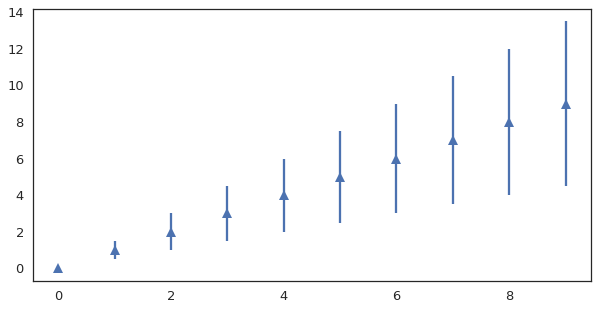

In [288]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.errorbar(np.arange(0,10),np.arange(0,10),np.arange(0,5,0.5),linestyle='None', marker='^')

In [332]:
wholeannotation.to_csv('wholeannotation.csv')

## top k

In [70]:
tablecut = pd.read_table("/Share/home/younglee/projects/exRNA/hcc_lulab/05.matrix/hcc_lulab.sequentialMap.homer.merged.mx", sep = "\t")
allmx = np.array(tablecut.iloc[:,1:-1])
tablecut.index[np.argsort(-np.sum(allmx,axis=1))[:20]]

Index(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000283364.1', 'lncRNA_ENSG00000264066.6',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000207778.3',
       'lncRNA_ENSG00000267391.4', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199075.1', 'miRNA_ENSG00000207789.1',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000283450.1',
       'lncRNA_ENSG00000234741.7', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1'],
      dtype='object')

In [7]:
binnedpath = '/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/hcc_lulab.sequentialMap.featureCounts.merged.filt0.binned.withheader.mx'
fulllengthpath = '/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/hcc_lulab.sequentialMap.featureCounts.merged.mx'


In [147]:
np.where(wholeannotab['Sample_ID'].iloc[np.where(wholeannotab['use']==1)])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),)

In [172]:
np.where(np.in1d(np.array(mxcolumns),
               wholeannotab['Sample_ID'].iloc[np.where(wholeannotab['use']==1)]))[0]

array([ 3,  4,  6,  8,  9, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 25, 27,
       28, 29, 36, 38, 40, 42, 43, 44, 45, 47, 48, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63])

In [179]:
np.array(wholeannotab['Sample_ID'])[46]#BD-low-mix，507891-B，511122-A  14  31  46

'lulab_511122_A'

In [181]:
wholeannotab['sampleuse'][np.array([14,31,46])] = -1

In [40]:
wholeannotab.to_csv('wholeannotation.csv')

In [38]:
wholeannotab['Disease_status_formal'] = 'HCC'

In [39]:
wholeannotab['Disease_status_formal'][wholeannotab['Disease_status'] =='Healthy'] = 'HD'
wholeannotab['Disease_status_formal'][wholeannotab['Disease_status'] =='mixed by 5 HBV'] = 'CHB'
wholeannotab['Disease_status_formal'][wholeannotab['Disease_status'] =='HCC_after_surgery'] = 'Postoperative'

#### expression matrix和sample annotation sample顺序不同

In [8]:
mxcolumns = pd.read_table(fulllengthpath, sep = "\t").columns

In [151]:
np.searchsorted(np.array(mxcolumns),
               wholeannotab['Sample_ID'].iloc[np.where(wholeannotab['use']==1)])

array([ 4,  8,  9, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29,
       36, 38, 40, 42, 60, 61, 62, 63,  3,  6, 43, 44, 45, 48, 47, 49, 53,
       54, 55, 56, 57, 58, 59, 48, 48, 48])

In [159]:
np.where(np.in1d(np.array(mxcolumns),
               wholeannotab['Sample_ID'].iloc[np.where(wholeannotab['use']==1)]))[0]

array([ 3,  4,  6,  8,  9, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 25, 27,
       28, 29, 36, 38, 40, 42, 43, 44, 45, 47, 48, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63])

In [ ]:
np.array(mxcolumns)[np.where(np.in1d(np.array(mxcolumns),
               wholeannotab['Sample_ID'].iloc[np.where(wholeannotab['use']==1)]))[0]]

In [21]:
tablecut = pd.read_table(fulllengthpath, sep = "\t").iloc[:,
                                                          np.concatenate((np.where(np.in1d(np.array(mxcolumns),
               wholeannotab['Sample_ID'].iloc[np.where(wholeannotab['use']==1)]))[0],np.array([49,50,51])))
                                                         ]

In [263]:
wholeannotab['Sample_ID'].iloc[np.where(wholeannotab['use']==1)[0]].shape

(43,)

In [15]:
mxcolumns[np.where(np.in1d(np.array(mxcolumns),
               wholeannotab['Sample_ID'].iloc[np.where(wholeannotab['use']==1)]))[0]]

Index(['lulab_17402567_B', 'lulab_249136_B', 'lulab_3497470_B',
       'lulab_385247_B', 'lulab_423976_B', 'lulab_497411_B', 'lulab_497497_B',
       'lulab_498127_B', 'lulab_498187_B', 'lulab_498221_B', 'lulab_507450_B',
       'lulab_507468_B', 'lulab_507511_B', 'lulab_507599_B', 'lulab_507867_B',
       'lulab_507887_B', 'lulab_507909_B', 'lulab_508877_B', 'lulab_508897_B',
       'lulab_511030_B', 'lulab_511485_B', 'lulab_515058_B', 'lulab_515292_B',
       'lulab_5474594_B', 'lulab_6474170_B', 'lulab_8397116_B', 'lulab_CXD',
       'lulab_LY', 'lulab_Normal_1', 'lulab_Normal_2', 'lulab_Normal_3',
       'lulab_Normal_4', 'lulab_Normal_5', 'lulab_Normal_6', 'lulab_Normal_7',
       'lulab_Normal_8', 'lulab_SH325716_B', 'lulab_SH327409_B',
       'lulab_SH327412_B', 'lulab_SH327428_B'],
      dtype='object')

In [20]:
mxcolumns[49]

'lulab_mix1_combined_R1'

In [23]:
tablecut.columns

Index(['lulab_17402567_B', 'lulab_249136_B', 'lulab_3497470_B',
       'lulab_385247_B', 'lulab_423976_B', 'lulab_497411_B', 'lulab_497497_B',
       'lulab_498127_B', 'lulab_498187_B', 'lulab_498221_B', 'lulab_507450_B',
       'lulab_507468_B', 'lulab_507511_B', 'lulab_507599_B', 'lulab_507867_B',
       'lulab_507887_B', 'lulab_507909_B', 'lulab_508877_B', 'lulab_508897_B',
       'lulab_511030_B', 'lulab_511485_B', 'lulab_515058_B', 'lulab_515292_B',
       'lulab_5474594_B', 'lulab_6474170_B', 'lulab_8397116_B', 'lulab_CXD',
       'lulab_LY', 'lulab_Normal_1', 'lulab_Normal_2', 'lulab_Normal_3',
       'lulab_Normal_4', 'lulab_Normal_5', 'lulab_Normal_6', 'lulab_Normal_7',
       'lulab_Normal_8', 'lulab_SH325716_B', 'lulab_SH327409_B',
       'lulab_SH327412_B', 'lulab_SH327428_B', 'lulab_mix1_combined_R1',
       'lulab_mix2_combined_R1', 'lulab_mix3_combined_R1'],
      dtype='object')

In [47]:
allmx = np.array(tablecut.iloc[:,:])
print (allmx.shape)
dropind = np.array([37])
remaindim = 64- dropind.shape[0]
remainmx = allmx[:,np.setdiff1d(np.arange(0,64),dropind)]
#### Remove genes that are not expressed in any samples
remainmx = remainmx[np.sum(remainmx,axis=1) !=0]
top100ind = np.argsort(-np.sum(remainmx,axis=1))[:100]
totalreads = np.sum(remainmx,axis=0)

(854770, 64)


In [163]:
tablecut.columns

Index(['lulab_17402567_B', 'lulab_249136_B', 'lulab_3497470_B',
       'lulab_385247_B', 'lulab_423976_B', 'lulab_497411_B', 'lulab_497497_B',
       'lulab_498127_B', 'lulab_498187_B', 'lulab_498221_B', 'lulab_507450_B',
       'lulab_507468_B', 'lulab_507511_B', 'lulab_507599_B', 'lulab_507867_B',
       'lulab_507887_B', 'lulab_507909_B', 'lulab_508877_B', 'lulab_508897_B',
       'lulab_511030_B', 'lulab_511485_B', 'lulab_515058_B', 'lulab_515292_B',
       'lulab_5474594_B', 'lulab_6474170_B', 'lulab_8397116_B', 'lulab_CXD',
       'lulab_LY', 'lulab_Normal_1', 'lulab_Normal_2', 'lulab_Normal_3',
       'lulab_Normal_4', 'lulab_Normal_5', 'lulab_Normal_6', 'lulab_Normal_7',
       'lulab_Normal_8', 'lulab_SH325716_B', 'lulab_SH327409_B',
       'lulab_SH327412_B', 'lulab_SH327428_B'],
      dtype='object')

In [24]:
top50arr = np.array(tablecut.iloc[np.argsort(-np.sum(tablecut,axis=1)),][:50])

In [27]:
top50ave = np.average(top50arr,axis=1)

In [29]:
top50arr.shape

(50, 43)

In [30]:
pccfortop50 = np.ndarray([43,])
for i in range(43):
    pccfortop50[i] = pearsonr(top50ave,top50arr[:,i])[0]

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,
         8.,  4., 10.,  6.]),
 array([0.57442118, 0.58429744, 0.59417369, 0.60404995, 0.61392621,
        0.62380247, 0.63367873, 0.64355499, 0.65343124, 0.6633075 ,
        0.67318376, 0.68306002, 0.69293628, 0.70281254, 0.71268879,
        0.72256505, 0.73244131, 0.74231757, 0.75219383, 0.76207009,
        0.77194634, 0.7818226 , 0.79169886, 0.80157512, 0.81145138,
        0.82132764, 0.83120389, 0.84108015, 0.85095641, 0.86083267,
        0.87070893, 0.88058519, 0.89046145, 0.9003377 , 0.91021396,
        0.92009022, 0.92996648, 0.93984274, 0.949719  , 0.95959525,
        0.96947151, 0.97934777, 0.98922403, 0.99910029]),
 <a list of 43 Patch objects>)

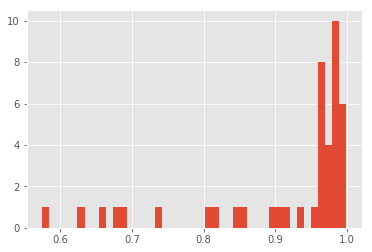

In [35]:
hist(pccfortop50,bins=43)

In [34]:
tablecut.columns[np.argsort(pccfortop50)]

Index(['lulab_497411_B', 'lulab_3497470_B', 'lulab_8397116_B',
       'lulab_Normal_8', 'lulab_511030_B', 'lulab_498187_B', 'lulab_249136_B',
       'lulab_17402567_B', 'lulab_497497_B', 'lulab_507450_B',
       'lulab_498221_B', 'lulab_LY', 'lulab_507511_B', 'lulab_498127_B',
       'lulab_CXD', 'lulab_Normal_2', 'lulab_Normal_7', 'lulab_Normal_5',
       'lulab_507909_B', 'lulab_SH327412_B', 'lulab_5474594_B',
       'lulab_Normal_6', 'lulab_mix3_combined_R1', 'lulab_507887_B',
       'lulab_6474170_B', 'lulab_mix1_combined_R1', 'lulab_423976_B',
       'lulab_Normal_1', 'lulab_511485_B', 'lulab_515292_B', 'lulab_507599_B',
       'lulab_507468_B', 'lulab_515058_B', 'lulab_SH327409_B',
       'lulab_SH327428_B', 'lulab_385247_B', 'lulab_Normal_3',
       'lulab_508877_B', 'lulab_mix2_combined_R1', 'lulab_Normal_4',
       'lulab_507867_B', 'lulab_SH325716_B', 'lulab_508897_B'],
      dtype='object')

In [12]:
top203 = np.array([top203[i].split('.')[0] for i in range(20)])
top203

array(['Y_RNA_ENSG00000201778', 'Y_RNA_ENSG00000201778',
       'Y_RNA_ENSG00000201778', 'miRNA_ENSG00000284565',
       'miRNA_ENSG00000284565', 'miRNA_ENSG00000284440',
       'miRNA_ENSG00000284440', 'miRNA_ENSG00000284440',
       'miRNA_ENSG00000284190', 'miRNA_ENSG00000284190',
       'miRNA_ENSG00000199179', 'miRNA_ENSG00000199179',
       'miRNA_ENSG00000199085', 'miRNA_ENSG00000199085',
       'miRNA_ENSG00000199075', 'miRNA_ENSG00000199075',
       'miRNA_ENSG00000207789', 'miRNA_ENSG00000207789',
       'miRNA_ENSG00000283450', 'miRNA_ENSG00000283450'], dtype='<U21')

In [10]:

#trim:
top201 = np.array(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000283364.1', 'lncRNA_ENSG00000264066.6',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000207778.3',
       'lncRNA_ENSG00000267391.4', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199075.1', 'miRNA_ENSG00000207789.1',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000283450.1',
       'lncRNA_ENSG00000234741.7', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1'])

#no trim:
#fulllength:
top202 = np.array(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199075.1', 'miRNA_ENSG00000207789.1',
       'miRNA_ENSG00000283450.1', 'miRNA_ENSG00000274705.2',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000283935.1', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1',
       'miRNA_ENSG00000283733.1', 'miRNA_ENSG00000283824.1',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000199072.3'])

#no trim:
#bin:
top203 = np.array(['Y_RNA_ENSG00000201778.1__157153548__157153578',
       'Y_RNA_ENSG00000201778.1__157153563__157153593',
       'Y_RNA_ENSG00000201778.1__157153578__157153608',
       'miRNA_ENSG00000284565.1__28861384__28861414',
       'miRNA_ENSG00000284565.1__28861399__28861429',
       'miRNA_ENSG00000284440.1__58451089__58451119',
       'miRNA_ENSG00000284440.1__58451074__58451104',
       'miRNA_ENSG00000284440.1__58451104__58451134',
       'miRNA_ENSG00000284190.1__59841281__59841311',
       'miRNA_ENSG00000284190.1__59841266__59841296',
       'miRNA_ENSG00000199179.3__62603701__62603731',
       'miRNA_ENSG00000199179.3__62603686__62603716',
       'miRNA_ENSG00000199085.3__25949934__25949964',
       'miRNA_ENSG00000199085.3__25949919__25949949',
       'miRNA_ENSG00000199075.1__37969419__37969449',
       'miRNA_ENSG00000199075.1__37969404__37969434',
       'miRNA_ENSG00000207789.1__57824639__57824669',
       'miRNA_ENSG00000207789.1__57824654__57824684',
       'miRNA_ENSG00000283450.1__41660459__41660489',
       'miRNA_ENSG00000283450.1__41660444__41660474'])

In [13]:
np.intersect1d(top202,top203)

array([], dtype='<U23')

In [14]:
np.setdiff1d(top202,top203)

array(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000199072.3',
       'miRNA_ENSG00000199075.1', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000199150.3',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000207789.1',
       'miRNA_ENSG00000208012.1', 'miRNA_ENSG00000274705.2',
       'miRNA_ENSG00000283450.1', 'miRNA_ENSG00000283733.1',
       'miRNA_ENSG00000283824.1', 'miRNA_ENSG00000283935.1',
       'miRNA_ENSG00000284190.1', 'miRNA_ENSG00000284440.1',
       'miRNA_ENSG00000284520.1', 'miRNA_ENSG00000284565.1'], dtype='<U23')

In [ ]:
plt.annotate('overlap genes', xy=np.array([0.08, -0.15]), xytext=(-150,-130),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.9),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='black'))

In [46]:
remainmx[np.sum(remainmx > 2,axis=1) >10,:].shape

(20515, 63)

In [49]:
filterremain = remainmx[np.sum(remainmx > 2,axis=1) >10,:]
top100ind_ = np.argsort(-np.sum(filterremain,axis=1))[:100]
totalreads_ = np.sum(filterremain,axis=0)

In [358]:
(remainmx[top100ind[0:100]]/totalreads).shape
np.cumsum((remainmx[top100ind[0:100]]/totalreads).T,axis=1)

(100, 63)

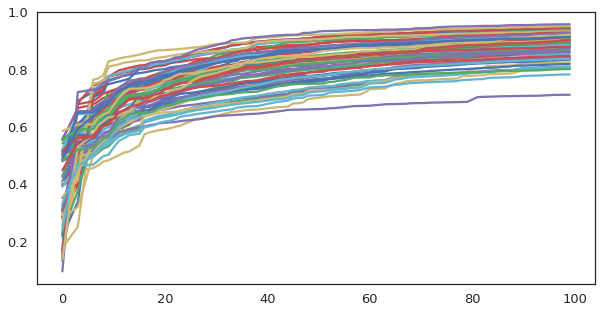

In [370]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.plot(np.cumsum((remainmx[top100ind[0:100]]/totalreads).T,axis=1).T)

In [391]:
np.concatenate((np.cumsum((remainmx[top100ind[0:100]]/totalreads).T,axis=1).T.reshape(-1,1),np.array([np.repeat('Top '+str(i+1),63) for i in range(100)]).reshape(-1,1)),axis=1)

array([['0.3928552547473415', 'Top 1'],
       ['0.1496862730263777', 'Top 1'],
       ['0.2849390450733944', 'Top 1'],
       ...,
       ['0.9113042025674255', 'Top 100'],
       ['0.7999265453647194', 'Top 100'],
       ['0.845614773871857', 'Top 100']], dtype='<U32')

In [16]:
topktable = pd.DataFrame(np.concatenate((np.cumsum((remainmx[top100ind[0:100]]/totalreads).T,axis=1).T.reshape(-1,1),np.array([np.repeat('Top '+str(i+1),remaindim ) for i in range(100)]).reshape(-1,1)),axis=1)
            ,columns=['ratio','topind'])
topktable['ratio'] = pd.to_numeric(topktable['ratio'])

In [17]:
topktable1 = pd.DataFrame(np.concatenate((np.cumsum((filterremain[top100ind_[0:100]]/totalreads_).T,axis=1).T.reshape(-1,1),np.array([np.repeat('Top '+str(i+1),remaindim ) for i in range(100)]).reshape(-1,1)),axis=1)
            ,columns=['ratio','topind'])
topktable1['ratio'] = pd.to_numeric(topktable1['ratio'])

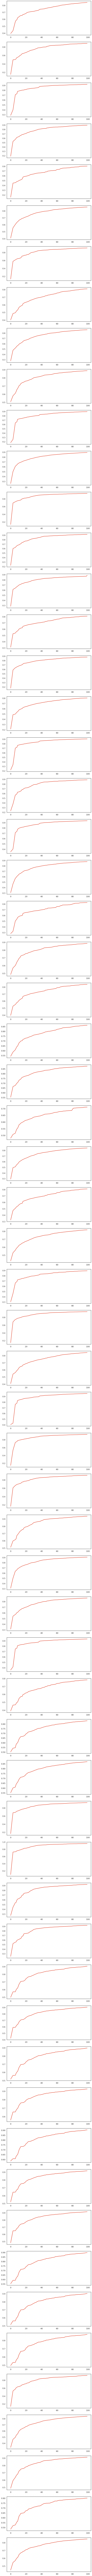

In [453]:
fig,ax=plt.subplots(63,figsize=(10,5*63))
for i in range(63):
    ax[i].plot(np.array(topktable['ratio'])[np.arange(i,i+6300,63)])

In [408]:
topktable.iloc[np.repeat(np.arange(0,63),np.array([1,3]).shape[0])+np.repeat(np.array([1,3]),63)*63,:].head()

,ratio,topind
63,0.406241,Top 2
63,0.406241,Top 2
64,0.265152,Top 2
64,0.265152,Top 2
65,0.322156,Top 2


In [18]:
def box_plot_1(styind,contextind,width,height,showdot,showbox,dotsize,fontsize,
               ylim,boxwidth,box_violin,palettesind,saturation,selectind,usefilter):
    sns.set_context(contexts[int(contextind)])
    if np.array(selectind).shape[0]==0:
        selectind = (1,2,5,10,20,30)
    sns.set_style(styles[int(styind)])
    fig,ax=plt.subplots(1,figsize=(width,height))
    ax.set_yticks(np.arange(0,1.1,0.1))
    if usefilter =='yes':
        topktable_ = topktable1.iloc[np.repeat(np.arange(0,remaindim ),np.array(selectind).shape[0]).reshape(-1,np.array(selectind).shape[0]).T.ravel()+
                               np.repeat(np.array(selectind)-1,remaindim )*remaindim ,:]
    elif usefilter =='no':
        topktable_ = topktable.iloc[np.repeat(np.arange(0,remaindim ),np.array(selectind).shape[0]).reshape(-1,np.array(selectind).shape[0]).T.ravel()+
                               np.repeat(np.array(selectind)-1,remaindim )*remaindim ,:]
    
    if showbox =='yes':
        if box_violin=='violin':
            sns.violinplot(ax=ax,x='topind',y='ratio', data=topktable_, palette=palettes[palettesind],width=boxwidth,saturation=saturation)
        elif box_violin=='box':
            sns.boxplot(ax=ax,x='topind',y='ratio', data=topktable_, palette=palettes[palettesind],width=boxwidth,saturation=saturation)
    if showdot =='yes':
        sns.swarmplot(x='topind',y='ratio', data=topktable_, size=dotsize, edgecolor="black", linewidth=.9)
    ax.set_ylim(ylim)
    ax.set_title('Top K Curve')
    ax.axhline(y=0.7)
    ax.axhline(y=0.8)
    # statistical annotation
    #ax.errorbar(np.arange(0,3),yforerr,error,linestyle='None', marker='^',elinewidth=elinewidth,ecolor='m')
    
interact(box_plot_1,styind=FloatSlider(min=0,max=3,step=1,value=0),
               contextind=FloatSlider(min=0,max=3,step=1,value=0),
                width =FloatSlider(min=8,max=20,step=1,value=20),
                 height= FloatSlider(min=4,max=10,step=1,value=10),
         boxwidth= FloatSlider(min=0.05,max=1,step=0.05,value=0.6),
         dotsize= FloatSlider(min=1,max=8,step=0.2,value=2.6),
         fontsize= FloatSlider(min=8,max=30,step=2,value=12),
         ylim=FloatRangeSlider(value=[0,1],min=0,max=1,step=0.05),
            showdot=RadioButtons(options=['yes','no'],value='no'),
         showbox=RadioButtons(options=['yes','no'],value='yes'),
        box_violin = Dropdown(options=['box','violin'],value='box'),
        palettesind=IntSlider(min=0,max=len(palettes)-1,step=1,value=4),
        saturation=FloatSlider(min=0,max=1,step=0.1,value=0.8),
        selectind = SelectMultiple(options=np.arange(1,101)),
        usefilter = RadioButtons(options=['yes','no'],value='yes'))

interactive(children=(FloatSlider(value=0.0, description='styind', max=3.0, step=1.0), FloatSlider(value=0.0, description='contextind', max=3.0, step=1.0), FloatSlider(value=20.0, description='width', max=20.0, min=8.0, step=1.0), FloatSlider(value=10.0, description='height', max=10.0, min=4.0, step=1.0), RadioButtons(description='showdot', index=1, options=('yes', 'no'), value='no'), RadioButtons(description='showbox', options=('yes', 'no'), value='yes'), FloatSlider(value=2.6, description='dotsize', max=8.0, min=1.0, step=0.2), FloatSlider(value=12.0, description='fontsize', max=30.0, min=8.0, step=2.0), FloatRangeSlider(value=(0.0, 1.0), description='ylim', max=1.0, step=0.05), FloatSlider(value=0.6, description='boxwidth', max=1.0, min=0.05, step=0.05), Dropdown(description='box_violin', options=('box', 'violin'), value='box'), IntSlider(value=4, description='palettesind', max=12), FloatSlider(value=0.8, description='saturation', max=1.0), SelectMultiple(description='selectind', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100), value=()), RadioButtons(description='usefilter', options=('yes', 'no'), value='yes'), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot_1>

In [19]:
def box_plot_1(styind,contextind,width,height,showdot,showbox,dotsize,fontsize,
               ylim,boxwidth,box_violin,palettesind,saturation,selectind,usefilter):
    sns.set_context(contexts[int(contextind)])
    if np.array(selectind).shape[0]==0:
        selectind = (1,2,5,10,20,30)
    sns.set_style(styles[int(styind)])
    fig,ax=plt.subplots(1,figsize=(width,height))
    ax.set_yticks(np.arange(0,1.1,0.1))
    if usefilter =='yes':
        topktable_ = topktable1.iloc[np.repeat(np.arange(0,remaindim ),np.array(selectind).shape[0]).reshape(-1,np.array(selectind).shape[0]).T.ravel()+
                               np.repeat(np.array(selectind)-1,remaindim )*remaindim ,:]
    elif usefilter =='no':
        topktable_ = topktable.iloc[np.repeat(np.arange(0,remaindim ),np.array(selectind).shape[0]).reshape(-1,np.array(selectind).shape[0]).T.ravel()+
                               np.repeat(np.array(selectind)-1,remaindim )*remaindim ,:]
    
    topktable_ = topktable.iloc[np.repeat(np.arange(0,63),np.array(selectind).shape[0]).reshape(-1,np.array(selectind).shape[0]).T.ravel()+
                               np.repeat(np.array(selectind)-1,63)*63,:]
    if showbox =='yes':
        if box_violin=='violin':
            sns.violinplot(ax=ax,x='topind',y='ratio', data=topktable_, palette=palettes[palettesind],width=boxwidth,saturation=saturation)
        elif box_violin=='box':
            sns.boxplot(ax=ax,x='topind',y='ratio', data=topktable_, palette=palettes[palettesind],width=boxwidth,saturation=saturation)
    if showdot =='yes':
        sns.swarmplot(x='topind',y='ratio', data=topktable_, size=dotsize, edgecolor="black", linewidth=.9)
    ax.set_ylim(ylim)
    ax.set_title('Top K Curve')
    # statistical annotation
    #ax.errorbar(np.arange(0,3),yforerr,error,linestyle='None', marker='^',elinewidth=elinewidth,ecolor='m')
    ax.axhline(y=0.7)
    ax.axhline(y=0.8)
interact(box_plot_1,styind=FloatSlider(min=0,max=3,step=1,value=0),
               contextind=FloatSlider(min=0,max=3,step=1,value=0),
                width =FloatSlider(min=8,max=40,step=1,value=40),
                 height= FloatSlider(min=4,max=10,step=1,value=10),
         boxwidth= FloatSlider(min=0.05,max=1,step=0.05,value=0.6),
         dotsize= FloatSlider(min=1,max=8,step=0.2,value=2.6),
         fontsize= FloatSlider(min=8,max=30,step=2,value=12),
         ylim=FloatRangeSlider(value=[0,1],min=0,max=1,step=0.05),
            showdot=RadioButtons(options=['yes','no'],value='no'),
         showbox=RadioButtons(options=['yes','no'],value='yes'),
        box_violin = Dropdown(options=['box','violin'],value='box'),
        palettesind=IntSlider(min=0,max=len(palettes)-1,step=1,value=4),
        saturation=FloatSlider(min=0,max=1,step=0.1,value=0.8),
        selectind = SelectMultiple(options=np.arange(1,101)),
        usefilter = RadioButtons(options=['yes','no'],value='yes'))

interactive(children=(FloatSlider(value=0.0, description='styind', max=3.0, step=1.0), FloatSlider(value=0.0, description='contextind', max=3.0, step=1.0), FloatSlider(value=40.0, description='width', max=40.0, min=8.0, step=1.0), FloatSlider(value=10.0, description='height', max=10.0, min=4.0, step=1.0), RadioButtons(description='showdot', index=1, options=('yes', 'no'), value='no'), RadioButtons(description='showbox', options=('yes', 'no'), value='yes'), FloatSlider(value=2.6, description='dotsize', max=8.0, min=1.0, step=0.2), FloatSlider(value=12.0, description='fontsize', max=30.0, min=8.0, step=2.0), FloatRangeSlider(value=(0.0, 1.0), description='ylim', max=1.0, step=0.05), FloatSlider(value=0.6, description='boxwidth', max=1.0, min=0.05, step=0.05), Dropdown(description='box_violin', options=('box', 'violin'), value='box'), IntSlider(value=4, description='palettesind', max=12), FloatSlider(value=0.8, description='saturation', max=1.0), SelectMultiple(description='selectind', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100), value=()), RadioButtons(description='usefilter', options=('yes', 'no'), value='yes'), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot_1>

In [20]:
def box_plot_1(styind,contextind,width,height,showdot,showbox,dotsize,fontsize,
               ylim,boxwidth,box_violin,palettesind,saturation,selectind,usefilter):
    sns.set_context(contexts[int(contextind)])
    if np.array(selectind).shape[0]==0:
        selectind = (1,2,5,10,20,30)
    sns.set_style(styles[int(styind)])
    fig,ax=plt.subplots(1,figsize=(width,height))
    ax.set_yticks(np.arange(0,1.1,0.1))
    if usefilter =='yes':
        topktable_ = topktable1.iloc[np.repeat(np.arange(0,remaindim ),np.array(selectind).shape[0]).reshape(-1,np.array(selectind).shape[0]).T.ravel()+
                               np.repeat(np.array(selectind)-1,remaindim )*remaindim ,:]
    elif usefilter =='no':
        topktable_ = topktable.iloc[np.repeat(np.arange(0,remaindim ),np.array(selectind).shape[0]).reshape(-1,np.array(selectind).shape[0]).T.ravel()+
                               np.repeat(np.array(selectind)-1,remaindim )*remaindim ,:]
    
    topktable_ = topktable.iloc[np.repeat(np.arange(0,63),np.array(selectind).shape[0]).reshape(-1,np.array(selectind).shape[0]).T.ravel()+
                               np.repeat(np.array(selectind)-1,63)*63,:]
    if showbox =='yes':
        if box_violin=='violin':
            sns.violinplot(ax=ax,x='topind',y='ratio', data=topktable_, palette=palettes[palettesind],width=boxwidth,saturation=saturation)
        elif box_violin=='box':
            sns.boxplot(ax=ax,x='topind',y='ratio', data=topktable_, palette=palettes[palettesind],width=boxwidth,saturation=saturation)
    if showdot =='yes':
        sns.swarmplot(x='topind',y='ratio', data=topktable_, size=dotsize, edgecolor="black", linewidth=.9)
    ax.set_ylim(ylim)
    ax.set_title('Top K Curve')
    # statistical annotation
    #ax.errorbar(np.arange(0,3),yforerr,error,linestyle='None', marker='^',elinewidth=elinewidth,ecolor='m')
    ax.axhline(y=0.7)
    ax.axhline(y=0.8)
interact(box_plot_1,styind=FloatSlider(min=0,max=3,step=1,value=0),
               contextind=FloatSlider(min=0,max=3,step=1,value=0),
                width =FloatSlider(min=8,max=40,step=1,value=30),
                 height= FloatSlider(min=4,max=10,step=1,value=10),
         boxwidth= FloatSlider(min=0.05,max=1,step=0.05,value=0.6),
         dotsize= FloatSlider(min=1,max=8,step=0.2,value=2.6),
         fontsize= FloatSlider(min=8,max=30,step=2,value=12),
         ylim=FloatRangeSlider(value=[0,1],min=0,max=1,step=0.05),
            showdot=RadioButtons(options=['yes','no'],value='no'),
         showbox=RadioButtons(options=['yes','no'],value='yes'),
        box_violin = Dropdown(options=['box','violin'],value='box'),
        palettesind=IntSlider(min=0,max=len(palettes)-1,step=1,value=4),
        saturation=FloatSlider(min=0,max=1,step=0.1,value=0.8),
        selectind = SelectMultiple(options=np.arange(1,101,2)),
        usefilter = RadioButtons(options=['yes','no'],value='yes'))

interactive(children=(FloatSlider(value=0.0, description='styind', max=3.0, step=1.0), FloatSlider(value=0.0, description='contextind', max=3.0, step=1.0), FloatSlider(value=30.0, description='width', max=40.0, min=8.0, step=1.0), FloatSlider(value=10.0, description='height', max=10.0, min=4.0, step=1.0), RadioButtons(description='showdot', index=1, options=('yes', 'no'), value='no'), RadioButtons(description='showbox', options=('yes', 'no'), value='yes'), FloatSlider(value=2.6, description='dotsize', max=8.0, min=1.0, step=0.2), FloatSlider(value=12.0, description='fontsize', max=30.0, min=8.0, step=2.0), FloatRangeSlider(value=(0.0, 1.0), description='ylim', max=1.0, step=0.05), FloatSlider(value=0.6, description='boxwidth', max=1.0, min=0.05, step=0.05), Dropdown(description='box_violin', options=('box', 'violin'), value='box'), IntSlider(value=4, description='palettesind', max=12), FloatSlider(value=0.8, description='saturation', max=1.0), SelectMultiple(description='selectind', options=(1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99), value=()), RadioButtons(description='usefilter', options=('yes', 'no'), value='yes'), Output()), _dom_classes=('widget-interact',))

<function __main__.box_plot_1>

In [10]:
wholeannotab = pd.read_table('wholeannotation.csv',sep=',')

In [35]:
wholeannotab = pd.read_table('wholeannotation.csv',sep=',')
wholeannotab['Sample_ID'] = np.array(['lulab_'+wholeannotab['Sample_ID'][i] for i in range(66)])
wholeannotab['Sample_ID'] = np.array([wholeannotab['Sample_ID'][i].replace('-','_') for i in range(66)])
wholeannotab.to_csv('wholeannotation.csv')

In [40]:
afterimputation = pd.read_table('05.matrix/imputation/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim.rds'
             ,sep=',')

In [51]:
np.array(afterimputation)[:,1:].astype('float').shape

(25480, 63)

In [59]:
np.log(filterremain[np.argsort(-np.sum(filterremain,axis=1))[0]])

array([16.5861703 , 15.97806961, 16.25030225, 15.78775671, 15.69037389,
       16.13903822, 15.31930525, 16.36099618, 16.34251423, 16.31010686,
       15.72809805, 16.48966955, 15.96529534, 15.63937607, 16.74512365,
       16.44827427, 16.09576517, 15.87570646, 16.70402904, 14.95469617,
       16.44438168, 16.40014889, 16.23367965, 16.66748435, 16.87229908,
       16.70951764, 16.93272161, 16.82932501, 16.17781483, 16.22621696,
       16.36896285, 16.02836447, 15.72511973, 16.5503168 , 16.462018  ,
       15.10608583, 15.29207081, 16.61156913, 16.3223637 , 16.43977124,
       16.62252691, 16.7029615 , 17.06282327, 16.60964922, 16.02710254,
       15.32538335, 15.53469396, 15.3758452 , 17.41900071, 17.40529265,
       17.13172084, 17.04590432, 17.10055476, 16.94235622, 17.02884518,
       16.9382193 , 17.2394211 , 17.04082934, 15.8187598 , 16.66429938,
       16.88343404, 17.07112259, 16.93795165])

In [61]:
np.log(e)

1.0

In [64]:
np.sum(np.array(pd.read_table('/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/hcc_lulab.sequentialMap.featureCounts.merged.mx')) <0)


0

### 去除top20 方便后续使用，以及最后一步再加上
先去掉full 或者binned top20
- full
        ['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199075.1',
       'miRNA_ENSG00000207789.1', 'miRNA_ENSG00000283450.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000283935.1', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1',
       'miRNA_ENSG00000283733.1', 'miRNA_ENSG00000199072.3',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000207547.1',
       'miRNA_ENSG00000283705.1', 'miRNA_ENSG00000284538.1',
       'miRNA_ENSG00000283824.1', 'miRNA_ENSG00000208037.1',
       'miRNA_ENSG00000284353.1', 'miRNA_ENSG00000207605.3',
       'miRNA_ENSG00000198987.1', 'miRNA_ENSG00000198974.3',
       'miRNA_ENSG00000208023.3', 'miRNA_ENSG00000207808.1',
       'miRNA_ENSG00000199165.3', 'miRNA_ENSG00000283990.1',
       'miRNA_ENSG00000198975.2', 'miRNA_ENSG00000199133.3',
       'miRNA_ENSG00000254324.3', 'miRNA_ENSG00000207870.1',
       'Y_RNA_ENSG00000201405.1', 'snoRNA_ENSG00000277846.1',
       'miRNA_ENSG00000207638.1', 'miRNA_ENSG00000283926.1',
       'miRNA_ENSG00000199065.3', 'miRNA_ENSG00000207721.1',
       'lncRNA_ENSG00000234741.7', 'miRNA_ENSG00000199135.1',
       'miRNA_ENSG00000283819.1', 'snoRNA_ENSG00000200084.1',
       'piRNA_piR-hsa-1177', 'snoRNA_ENSG00000276788.1',
       'miRNA_ENSG00000207864.3', 'Y_RNA_ENSG00000199200.2']
- binned
        ['Y_RNA_ENSG00000201778.1__157153548__157153578',
       'Y_RNA_ENSG00000201778.1__157153563__157153593',
       'Y_RNA_ENSG00000201778.1__157153578__157153608',
       'miRNA_ENSG00000284565.1__28861384__28861414',
       'miRNA_ENSG00000284565.1__28861399__28861429',
       'miRNA_ENSG00000284440.1__58451089__58451119',
       'miRNA_ENSG00000284440.1__58451074__58451104',
       'miRNA_ENSG00000284440.1__58451104__58451134',
       'miRNA_ENSG00000284190.1__59841281__59841311',
       'miRNA_ENSG00000284190.1__59841266__59841296',
       'miRNA_ENSG00000199179.3__62603701__62603731',
       'miRNA_ENSG00000199179.3__62603686__62603716',
       'miRNA_ENSG00000199075.1__37969419__37969449',
       'miRNA_ENSG00000199075.1__37969404__37969434',
       'miRNA_ENSG00000207789.1__57824639__57824669',
       'miRNA_ENSG00000207789.1__57824654__57824684',
       'miRNA_ENSG00000283450.1__41660459__41660489',
       'miRNA_ENSG00000274705.2__41660456__41660486',
       'miRNA_ENSG00000283450.1__41660444__41660474',
       'miRNA_ENSG00000274705.2__41660471__41660501',
       'miRNA_ENSG00000274705.2__41660501__41660508',
       'miRNA_ENSG00000199085.3__25949934__25949964',
       'miRNA_ENSG00000199085.3__25949919__25949949',
       'miRNA_ENSG00000199150.3__52268323__52268353',
       'miRNA_ENSG00000199150.3__52268353__52268361',
       'miRNA_ENSG00000199161.1__136670632__136670662',
       'miRNA_ENSG00000199161.1__136670647__136670677',
       'miRNA_ENSG00000199150.3__52268308__52268338',
       'miRNA_ENSG00000283935.1__30117109__30117139',
       'miRNA_ENSG00000284520.1__46113701__46113731',
       'miRNA_ENSG00000284520.1__46113686__46113716',
       'miRNA_ENSG00000199153.1__134804906__134804936',
       'miRNA_ENSG00000199153.1__134804936__134804945',
       'miRNA_ENSG00000283935.1__30117094__30117124',
       'miRNA_ENSG00000283935.1__30117079__30117109',
       'miRNA_ENSG00000199153.1__134804891__134804921',
       'miRNA_ENSG00000208012.1__53557222__53557252',
       'miRNA_ENSG00000208012.1__53557237__53557267',
       'miRNA_ENSG00000283733.1__160485382__160485412',
       'miRNA_ENSG00000283733.1__160485367__160485397',
       'miRNA_ENSG00000283733.1__160485352__160485382',
       'miRNA_ENSG00000199072.3__94176362__94176392',
       'miRNA_ENSG00000199072.3__94176347__94176377',
       'miRNA_ENSG00000199121.4__218402661__218402691',
       'miRNA_ENSG00000199121.4__218402646__218402676',
       'miRNA_ENSG00000207547.1__100093590__100093620',
       'miRNA_ENSG00000207547.1__100093575__100093605',
       'miRNA_ENSG00000207547.1__100093560__100093590',
       'miRNA_ENSG00000283705.1__91351344__91351374',
       'miRNA_ENSG00000283705.1__91351359__91351389']

In [16]:
fulltop20= np.array(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199075.1',
       'miRNA_ENSG00000207789.1', 'miRNA_ENSG00000283450.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000283935.1', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1',
       'miRNA_ENSG00000283733.1', 'miRNA_ENSG00000199072.3',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000207547.1'])

In [18]:
top20fullindex = np.where(np.isin(np.array(fullfeature.index),fulltop20))[0]

In [11]:
fullfeature = pd.read_table("/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/hcc_lulab.sequentialMap.featureCounts.merged.mx")

In [22]:
fullfeature.iloc[np.setdiff1d(np.arange(0,fullfeature.shape[0]),top20fullindex),:].to_csv('/home/chenxupeng/projects/training/05.matrix/hcc_lulab.sequentialMap.featureCounts.merged_deletetop20.mx')



In [24]:
fullfeature.shape

(854770, 64)

In [25]:
import feather
path = '/home/chenxupeng/projects/training/05.matrix/hcc_lulab.sequentialMap.featureCounts.merged_deletetop20.mx'
feather.write_dataframe(fullfeature.iloc[np.setdiff1d(np.arange(0,fullfeature.shape[0]),top20fullindex),:], path)


ModuleNotFoundError: No module named 'feather'

# feature selection
use ruvs20

In [46]:
def get_data(allsample=True):
    if allsample:
        return pd.read_table("05.matrix/forfeatureselectionbyruvs20_43sample.csv",sep=',').iloc[:,1:]
    else:
        return pd.read_table("05.matrix/forfeatureselectionbyruvs20_allsample.csv",sep=',').iloc[:,1:]
            

In [47]:
featuretable = get_data(allsample=True)
featuretable.head()

,sampleID,lables,miRNA_ENSG00000278267.1,miRNA_ENSG00000273874.1,miRNA_ENSG00000278791.1,miRNA_ENSG00000207730.3,miRNA_ENSG00000207607.3,miRNA_ENSG00000198976.1,miRNA_ENSG00000278073.1,miRNA_ENSG00000283712.1,...,mRNA_ENSG00000198712.1,mRNA_ENSG00000228253.1,mRNA_ENSG00000198899.2,mRNA_ENSG00000198938.2,mRNA_ENSG00000198840.2,mRNA_ENSG00000212907.2,mRNA_ENSG00000198886.2,mRNA_ENSG00000198786.2,mRNA_ENSG00000198695.2,mRNA_ENSG00000198727.2
0,lulab_249136_B,1,-0.491866,-0.923560,4.479815,5.923640,9.711510,7.676220,-1.543432,0.659163,...,8.947549,4.702041,7.737807,8.008278,8.072879,6.702372,9.313907,7.377253,8.671882,7.410216
1,lulab_385247_B,1,0.562208,0.482438,4.759852,3.050369,7.070806,4.849558,-2.128172,0.837421,...,8.617759,5.311301,7.945348,7.841172,8.272158,6.104936,8.716427,6.858191,7.234688,7.070387
2,lulab_423976_B,1,-0.942090,-0.452485,4.871763,3.365782,6.948669,5.052097,-0.894910,0.335197,...,6.905213,4.656888,6.735751,6.964339,8.794410,5.877878,7.812213,6.372336,7.712192,6.459767
3,lulab_497411_B,1,-0.821413,0.120182,4.648710,4.601029,8.647034,6.366213,-1.617053,1.784703,...,7.606882,4.181408,7.968318,6.892087,8.116870,6.166106,8.854342,7.300245,8.349331,6.138221
4,lulab_497497_B,1,-0.473076,-0.225420,4.933859,3.602091,7.779279,5.594608,-1.260648,1.820005,...,7.962154,5.143851,7.639491,6.979990,8.240308,6.273394,8.587958,7.252821,8.328224,6.780117


In [48]:
featuresarray = np.array(featuretable.iloc[:,2:])

In [74]:
featuretable['lables'][featuretable['lables'] ==2]=0

In [75]:
np.array(featuretable['lables']).reshape(1,-1).shape

(1, 43)

#### 直接feature selection发现lasso几乎所有权重都为零，topk gene？

In [142]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.0001)
X, y = featuresarray, np.array(featuretable['lables'])
clf.fit(X, y)
featuresarray[:,np.where(clf.coef_!=0)[0]].shape
np.unique(clf.coef_,return_counts=True)


(array([-1.37654767e-01, -7.36368819e-02, -6.18387853e-02, -4.66489061e-02,
        -4.63553325e-02, -4.62748716e-02, -4.61499322e-02, -3.36102568e-02,
        -3.14792611e-02, -2.93845333e-02, -2.82626342e-02, -1.85780761e-02,
        -1.65523820e-02, -1.37142633e-02, -1.29325433e-02, -7.01515814e-03,
        -4.78916642e-03, -3.48301576e-03, -2.81696306e-03, -2.65024804e-03,
        -2.41066057e-03, -2.22113537e-03, -2.14130351e-03, -2.11083425e-03,
        -2.11037385e-03, -2.06727630e-03, -2.05054947e-03, -1.56387433e-03,
        -1.28658918e-03, -7.89520593e-04, -5.71598023e-04, -3.30820208e-04,
        -3.10158975e-04, -2.98819389e-04, -2.69891187e-04, -2.41058651e-04,
        -1.87254650e-04, -1.26235373e-04, -7.96316480e-05, -6.14032273e-05,
        -5.66134557e-05, -5.61671136e-05, -4.16242764e-05, -3.49513995e-05,
        -2.70457725e-05, -7.08967983e-06,  0.00000000e+00,  4.10195220e-06,
         4.37245159e-06,  4.41516880e-06,  1.74825795e-05,  2.00609504e-05,
         2.1

In [143]:
clf.coef_[np.argsort(-np.abs(clf.coef_))[:20]]

array([-0.13765477,  0.08489109, -0.07363688, -0.06183879,  0.05502709,
       -0.04664891,  0.04648816, -0.04635533, -0.04627487, -0.04614993,
        0.04017367, -0.03361026, -0.03147926, -0.02938453, -0.02826263,
       -0.01857808, -0.01655238,  0.01615986,  0.01483838, -0.01371426])

In [ ]:
### 用select from model的方法，可以用很多模型来选feature

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

X, y = featuresarray, np.array(featuretable['lables'])

#lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
#model = SelectFromModel(lsvc, prefit=True)
#X_new = model.transform(X)
#X_new.shape
clf = LassoCV()
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
# Reset the threshold till the number of features equals k.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.

In [ ]:
n_features

In [ ]:
while n_features > 1000:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]
    print (n_features)

In [204]:
X_transform.shape

(506, 2)

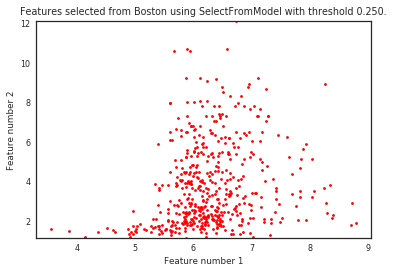

In [201]:
# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()


In [ ]:
def selection_method(method):
    if methods =='lasso':
        

# machine learning

In [ ]:
def MLmodel(modelname):
    if modelname=="rf":
        

In [78]:
featuresarray[:,np.where(clf.coef_!=0)[0]].shape

(43, 92)

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt



In [145]:
rfr = RandomForestClassifier(max_depth=2, random_state=0)
rfr.fit(featuresarray[:,np.where(clf.coef_!=0)[0]], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [55]:
def make_cv(splitnums,wholenum):
    cvind = {}
    wholeind = np.arange(0,wholenum)
    singlenum = int(wholenum/splitnums)
    np.random.seed(10)
    np.random.shuffle(wholeind)
    for i in range(splitnums-1):
        cvind[i] = wholeind[i*singlenum:(i+1)*singlenum]
    cvind[splitnums-1] = wholeind[(splitnums-1)*singlenum:]
    trainind,testind = {},{}
    for i in range(splitnums):
        trainind[i] = np.setdiff1d(wholeind,cvind[i])
        testind[i] = cvind[i]
    return trainind,testind

In [56]:
make_cv(3,43)

({0: array([ 0,  1,  4,  5,  8,  9, 10, 11, 13, 14, 15, 16, 19, 22, 23, 25, 26,
         28, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42]),
  1: array([ 0,  2,  3,  4,  6,  7,  8,  9, 10, 12, 15, 17, 18, 20, 21, 22, 24,
         25, 27, 28, 29, 31, 32, 33, 34, 36, 39, 41, 42]),
  2: array([ 1,  2,  3,  5,  6,  7, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23,
         24, 26, 27, 30, 31, 32, 33, 35, 37, 38, 40])},
 {0: array([31, 21, 27,  7, 32, 24,  2, 17, 18, 20, 12,  6, 33,  3]),
  1: array([26,  5, 13, 14, 37, 30,  1, 23, 35, 11, 40, 38, 16, 19]),
  2: array([ 4, 22, 34, 10, 39, 42,  8, 41, 29, 25, 28,  0, 15, 36,  9])})

In [146]:
features = featuresarray[:,np.where(clf.coef_!=0)[0]]

In [147]:
trainind,testind={},{}
for i in range(3):
    trainind[i] = make_cv(3,43)[0][i]
    testind[i] =make_cv(3,43)[1][i]

In [95]:
X_train, X_test, y_train, y_test =\
    train_test_split(features, y, test_size=0.33, random_state=0)

#### 选feature 要只在训练集上选，避免过拟合

In [200]:
X_train, X_test, y_train, y_test,y_predict_prob,fpr, tpr,roc_auc = {},{},{},{},{},{},{},{}
for i in range(3):
    lasso = linear_model.Lasso(alpha=0.001)
    y = np.array(featuretable['lables'])
    lasso.fit(featuresarray[trainind[i]], y[trainind[i]])
    features = featuresarray[:,np.where(lasso.coef_!=0)[0]]
    rfr = RandomForestClassifier(max_depth=2, random_state=0)
    X_train[i], X_test[i], y_train[i], y_test[i] =\
        features[trainind[i]], features[testind[i]], y[trainind[i]],y[testind[i]]
    y_predict_prob[i] = rfr.fit(X_train[i], y_train[i]).predict_proba(X_test[i])
    fpr[i], tpr[i], _ = roc_curve(y_test[i], y_predict_prob[i][:,1]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

In [201]:
for i in range(3):
    print (1- np.sum(np.abs(y_test[i] - rfr.fit(X_train[i], y_train[i]).predict(X_test[i])))
           /float(y_test[i].shape[0]))

1.0
1.0
1.0


Text(0.5,1,'Receiver operating characteristic example')

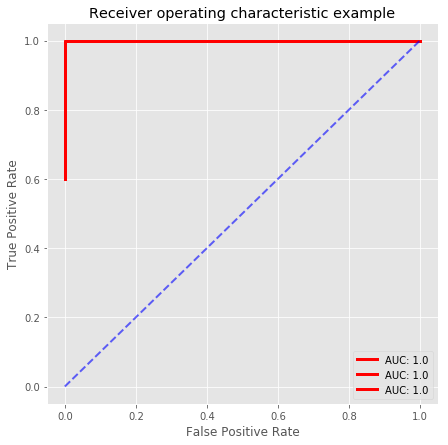

In [202]:
fig,ax=plt.subplots(1,figsize=(7,7))
for i in range(3):
    ax.plot(fpr[i],tpr[i],linewidth=3,color='r',label='AUC: '+str(roc_auc[i]))
ax.legend(prop={'size': 10})
ax.plot([0,1],[0,1], linewidth=2,alpha=0.6,color='b',linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')

#### 多分类

In [152]:
diseasestatus = wholeannotab['Disease_status'][np.where(np.in1d(wholeannotab['Sample_ID'],
               featuretable['sampleID']))[0]]

In [160]:
diseasestatus = wholeannotab['Stage-BCLC'][np.where(np.in1d(wholeannotab['Sample_ID'],
               featuretable['sampleID']))[0]]
diseasestatus[diseasestatus=='-'] = 'control'

In [162]:
diseasestatus[diseasestatus =='A'] = 0 
diseasestatus[diseasestatus =='B'] = 1 
diseasestatus[diseasestatus =='C'] = 2
diseasestatus[diseasestatus =='control'] = 3

In [207]:
np.unique(diseasestatus,return_counts=True)

(array([0, 1, 2, 3], dtype=object), array([16, 10,  4, 13]))

In [210]:
y = label_binarize(np.array(diseasestatus).astype('int'), classes=[0,1,2,3])
n_classes = 4
X_train, X_test, y_train, y_test,y_score,fpr, tpr,roc_auc = {},{},{},{},{},{},{},{}
for i in range(3):
    lasso.fit(featuresarray[trainind[i]], y[trainind[i]])
    features = featuresarray#[:,np.where(lasso.coef_!=0)[0]]
    X_train[i], X_test[i], y_train[i], y_test[i] =\
        features[trainind[i]], features[testind[i]], y[trainind[i]],y[testind[i]]
    #clf = OneVsRestClassifier(RandomForestClassifier(max_depth=2, random_state=0))
    #y_score[i] = clf.fit(X_train[i], y_train[i]).predict_proba(X_test[i])
    clf = OneVsRestClassifier(LinearSVC(random_state=0))
    y_score[i] = clf.fit(X_train[i], y_train[i]).decision_function(X_test[i])
    fpr[i] = dict()
    tpr[i] = dict()
    roc_auc[i] = dict()
    for j in range(n_classes):
        fpr[i][j], tpr[i][j], _ = roc_curve(y_test[i][:, j], y_score[i][:, j])
        roc_auc[i][j] = auc(fpr[i][j], tpr[i][j])

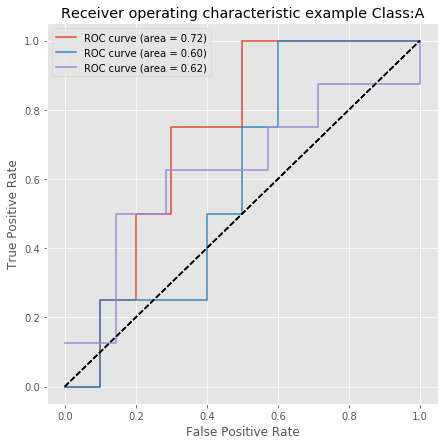

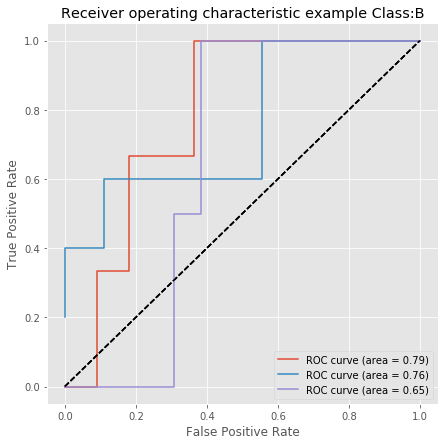

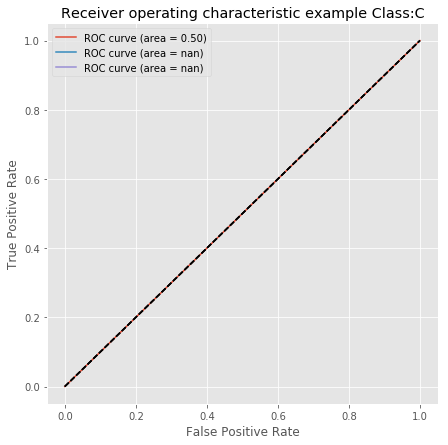

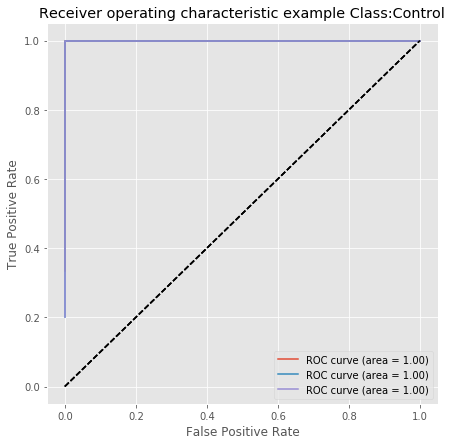

In [211]:
for j in range(4):  #classes
    fig,ax=plt.subplots(1,figsize=(7,7))
    for i in range(3):  #cv   
        
        ax.plot(fpr[i][j], tpr[i][j], label='ROC curve (area = %0.2f)' % roc_auc[i][j])
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver operating characteristic example'+' Class:' +['A','B','C','Control'][j])
        ax.legend(prop={'size': 10})